In [1]:
import h5py
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Input, Dense, Dropout
from keras.models import Model

In [2]:
file_path = r"C:\Users\Abhishek\Desktop\LEN-DB-master\LEN-DB-master\LEN-DB.hdf5"

In [3]:
lenDB = h5py.File(file_path, 'r')

In [4]:
earthquakes = list(lenDB['EQ'].keys())
print('Number of earthquakes: ', len(earthquakes))
print('Examples of earthquake keys: ', earthquakes[:5])

Number of earthquakes:  629095
Examples of earthquake keys:  ['AE_319A_1354213304.0999', 'AE_319A_1355252254.425', 'AE_319A_1360263749.5500002', 'AE_319A_1362597107.2', 'AE_319A_1363632861.6499999']


In [5]:
noise = list(lenDB['AN'].keys())
print('Number of noise waveforms: ', len(noise))
print('Examples of noise keys: ', noise[:5])

Number of noise waveforms:  615847
Examples of noise keys:  ['AE_113A_1334887512.5249999', 'AE_113A_1336639948.775', 'AE_113A_1337258057.2749', 'AE_113A_1337763598.2', 'AE_113A_1338669957.3500001']


In [6]:
ex1 = np.array(lenDB['EQ'][earthquakes[1000]])
nx1 = np.array(lenDB['AN'][noise[1000]])

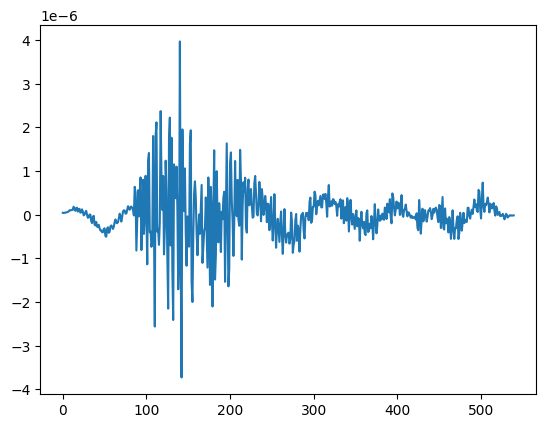

In [33]:
plt.plot(ex1[0,:])

<function matplotlib.pyplot.show(close=None, block=None)>

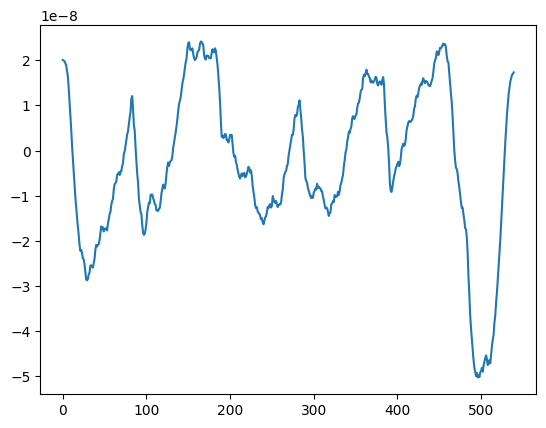

In [7]:
plt.plot(nx1[0,:])
plt.show

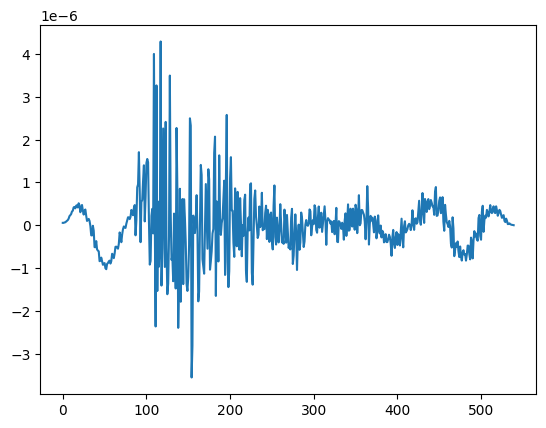

In [35]:
plt.plot(ex1[1,:])

<function matplotlib.pyplot.show(close=None, block=None)>

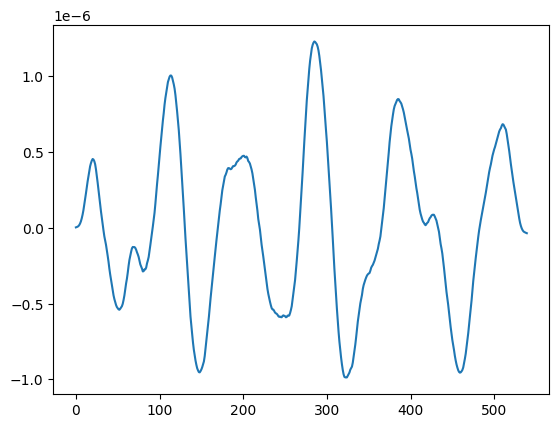

In [36]:
plt.plot(nx1[1,:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

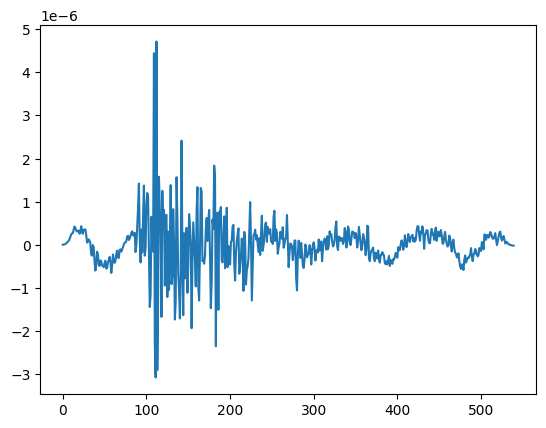

In [37]:
plt.plot(ex1[2,:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

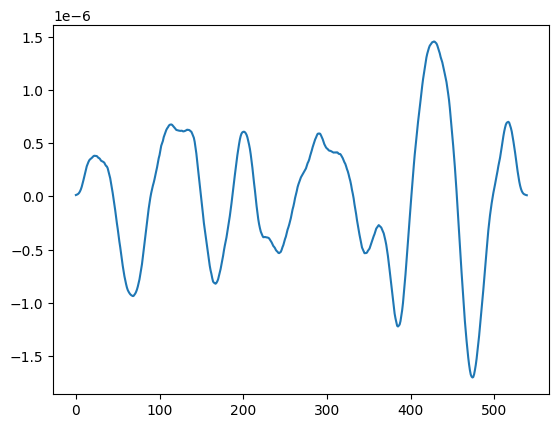

In [38]:
plt.plot(nx1[2,:])
plt.show

In [ ]:
import random

bigEarthquakes = random.sample([eq for eq in earthquakes if lenDB['EQ'][eq].attrs['mag'] > 7], 1)

In [ ]:
ex1 = np.array(lenDB['EQ'][bigEarthquakes[0]])

np.save('ex1.npy', ex1)

nx1 = np.array(lenDB['AN'][noise[1000]])

np.save('nx1.npy', nx1)

dn1 = ex1 + nx1

# Assuming `dn1` is your numpy array
np.save('dn1.npy', dn1)


In [ ]:
import random

lowEarthquakes = random.sample([eq for eq in earthquakes if 0 <= lenDB['EQ'][eq].attrs['mag'] <= 3], 1)


In [9]:
ex2 = np.array(lenDB['EQ'][lowEarthquakes[0]])

np.save('ex2.npy', ex2)

nx2 = np.array(lenDB['AN'][noise[1000]])

np.save('nx2.npy', nx2)

dn2 = ex2 + nx2

# Assuming `dn2` is your numpy array
np.save('dn2.npy', dn2)

In [10]:
import random

midEarthquakes = random.sample([eq for eq in earthquakes if 3 <= lenDB['EQ'][eq].attrs['mag'] <= 7], 1)


In [11]:
ex3 = np.array(lenDB['EQ'][midEarthquakes[0]])

np.save('ex3.npy', ex3)

nx3 = np.array(lenDB['AN'][noise[1000]])

np.save('nx3.npy', nx3)

dn3 = ex3 + nx3

# Assuming `dn3` is your numpy array
np.save('dn3.npy', dn3)

In [20]:
from keras.models import model_from_json
from keras.models import load_model

# load json and create model
json_file = open('bestInitial_syn.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
DDAE = model_from_json(loaded_model_json)

# load weights into new model
DDAE.load_weights("bestInitial_synW.h5")
print("Loaded model from disk")

Loaded model from disk


In [21]:
dn1.shape

(3, 540)

In [ ]:
plt.plot(dn1[:])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

In [ ]:
import time

def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

In [ ]:
dn1.shape

In [ ]:
dataNoise = dn1

In [ ]:
from keras.layers import Input, Dense, Dropout, concatenate, UpSampling1D, Flatten, MaxPooling1D, BatchNormalization, average, Conv2D
from keras.models import Model
import scipy.io
from keras import optimizers
from keras import backend as K
from tensorflow.python.keras import backend as KK
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization   
# from keras.layers.normalization import BatchNormalization
from keras import regularizers

#import theano
#import theano.tensor as T
import tensorflow as tf
import numbers
from tensorflow.python.framework import ops
from tensorflow.python.ops import standard_ops
from math import*
#import theano.tensor as T

import numpy as np
import matplotlib.pyplot as plt



corr1=0
corr2=1
corr3=1

# mat = scipy.io.loadmat ('Real_data.mat')
#dataNoise = mat['dn1'] 
# Reshape the input data to have 4 dimensions
dataNoise = dataNoise.reshape(-1,3,540,1)

# Print the shape of the reshaped input
#print("Reshaped input shape:", reshaped_input.shape)

# print(dataNoise.shape)
# dataNoise = np.transpose(dataNoise)
# dataNoise = np.reshape(dataNoise, (dataNoise.shape[0],dataNoise.shape[1]))
# print(dataNoise.shape)
INPUT_SIZE1 = dataNoise.shape[0]
INPUT_SIZE2 = dataNoise.shape[1]

input_img = Input(shape=(3,540,1)) 
#input_img = Input(shape=(INPUT_SIZE2,))



encoded1 = Conv2D(512,(3,3), activation='relu', padding='same')(input_img)
encoded2 = Conv2D(256,(3,3), activation='relu', padding = 'same')(encoded1)
encoded3 = Conv2D(128,(3,3), activation='relu', padding='same' )(encoded2)


decoded1 = Conv2D(128,(3,3), activation='relu', padding='same' )(encoded3)
decoded2 = Conv2D(256,(3,3), activation='relu', padding='same')(decoded1)
decoded3 = Conv2D(512,(3,3), activation='relu', padding='same' )(decoded2)

flatten = Flatten()(decoded3)
decoded = Dense(INPUT_SIZE2, activation='linear')(decoded3)




def correlation_coefficient_loss(y_true, y_pred):
    #optional
    x = y_true - y_pred
    y = y_pred
    mx = K.mean(x)
    my = K.mean(y)
    xm, ym = x-mx, y-my
    r_num = K.sum(tf.multiply(xm,ym))
    r_den = K.sqrt(tf.multiply(K.sum(K.square(xm)), K.sum(K.square(ym))))
    r = r_num / r_den
    r =  corr1 -r
    
    #1
    x1 = y_true
    y1 = y_pred
    mx1 = K.mean(x1)
    my1 = K.mean(y1)
    xm1, ym1 = x1-mx1, y1-my1
    r_num1 = K.sum(tf.multiply(xm1,ym1))
    r_den1 = K.sqrt(tf.multiply(K.sum(K.square(xm1)), K.sum(K.square(ym1))))
    r1 = r_num1 / r_den1
    r1 = corr2 -  r1
    
    # Optional
    '''  
    x2 = y_true-y_pred
    y2 = y_true
    mx2 = K.mean(x2)
    my2 = K.mean(y2)
    xm2, ym2 = x2-mx2, y2-my2
    r_num2 = K.sum(tf.multiply(xm2,ym2))
    r_den2 = K.sqrt(tf.multiply(K.sum(K.square(xm2)), K.sum(K.square(ym2))))
    r2 = r_num2 / r_den2
    r2 =    corr3 - (K.maximum(K.minimum(r2, 1.0), -1.0))
    '''
    return   K.square(r1) + K.square(r)
        

                    

autoencoder = Model(input_img, decoded)
sgd = tf.keras.optimizers.Adam(lr=0.001) #I made a change here
# sgd = optimizers.adam(lr=0.001)
autoencoder.compile(optimizer=sgd, loss=[correlation_coefficient_loss])
#autoencoder.compile(optimizer=sgd, loss='mse')

autoencoder.summary()


batch =INPUT_SIZE2

# Initialization of the DDAE parameters using the parameters obtained by the synthetic example,
#in the paper we use more than one synthetich examples to obtain these parameters. However, here, 
#we just show the flow of the DDAE by using only one synthetic example. 

for i in range(2,7):
    w = DDAE.layers[i].get_weights()
    autoencoder.layers[i].set_weights(w)
    
tic()
history = autoencoder.fit(dataNoise,dataNoise, epochs=500, batch_size=batch, shuffle=True)
toc()

In [ ]:
out = autoencoder.predict(dataNoise)



In [ ]:
out.shape